# Spectrogram of Audio Files

This code is provided as supplementary material of the lecture Quellencodierung.

This code illustrates
* spectrogram using short-term Fourier transform of different audio files

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sp
import librosa
import shutil
import librosa.display
import IPython.display as ipd

In [56]:
wave_filenames = {'piano': '../audio/KIMIKO ISHIZAKA - Goldberg Variations BWV 988 - 01 - Aria_45s.wav','speech': '../audio/33711__acclivity__excessiveexposure.wav','pop': '../audio/E-Core - Pingouin-Banquise_45s.wav'}

for key in wave_filenames:
    print('Audio playback: ',key)
    x, sampling_rate = librosa.load(wave_filenames[key], sr=22050)
    ipd.display(ipd.Audio(x, rate=sampling_rate))

Audio playback:  piano


Audio playback:  speech


Audio playback:  pop


In [59]:
window_types = ['hamming','hann','rect']

def get_window(window_type, n):
    if window_type == 'rect':
        return np.ones(n)
    else:
        return sp.get_window(window_type, n)
    
def get_spectrogram(x, sampling_rate, M):
    window = get_window('hann',M)

    step = M // 4

    s_indices = np.arange(0,len(x)-M,step)

    spectrogram = np.zeros((M//2, len(s_indices)))

    for idx,k in enumerate(s_indices):
        x_part = x[k + np.arange(M)] * window
        X_part = np.fft.rfft(x_part)
        spectrogram[:,idx] = 10*np.log10(np.abs(X_part[0:(M//2)]))

    frequencies = np.linspace(0, sampling_rate//2, M//2)
    times = s_indices * (1 / sampling_rate)
    
    return times,frequencies,spectrogram

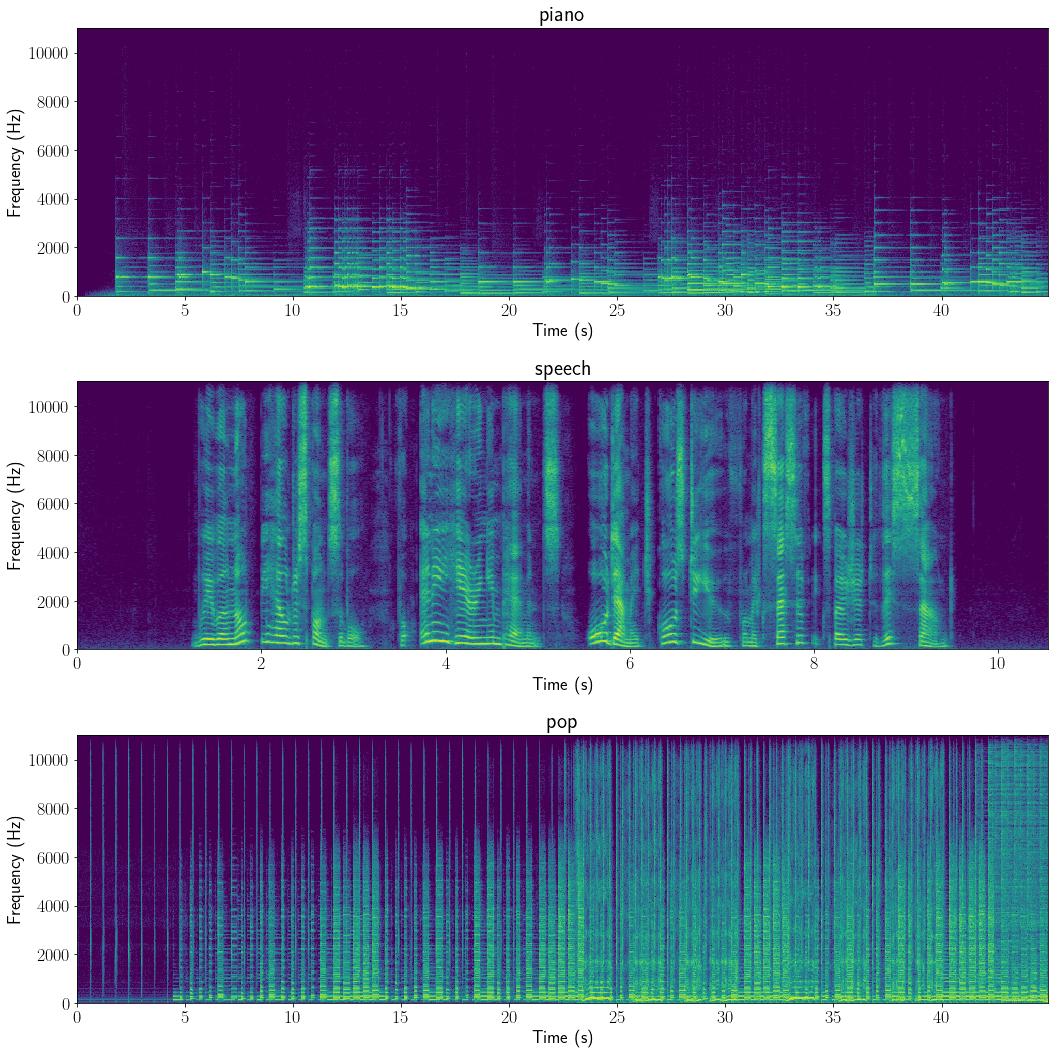

In [61]:
font = {'size'   : 18}
plt.rc('font', **font)
plt.rc('text', usetex=True if shutil.which('latex') else False)

plt.figure(figsize=(15, 15))

for idx,key in enumerate(wave_filenames):    
    # load file, do resample to 8 KhZ (as used in the DPCM system)
    x, sampling_rate = librosa.load(wave_filenames[key], sr=22050)

    times,frequencies,spectrogram = get_spectrogram(x, sampling_rate, 1024)
    
    #  only use a dynamic range of 47 dB
    v_min = np.max(spectrogram)-47
    
    plt.subplot(3,1,idx+1)
    plt.pcolormesh(times, frequencies, spectrogram, vmin=v_min, cmap='viridis')
    plt.ylabel(r'Frequency (Hz)')
    plt.xlabel(r'Time (s)')
    plt.title(key)
    
plt.tight_layout()
#plt.savefig('spectrogram_3x1.png',bbox_inches='tight',dpi=72)

Generate 3 separate figures

<Figure size 1080x1080 with 0 Axes>

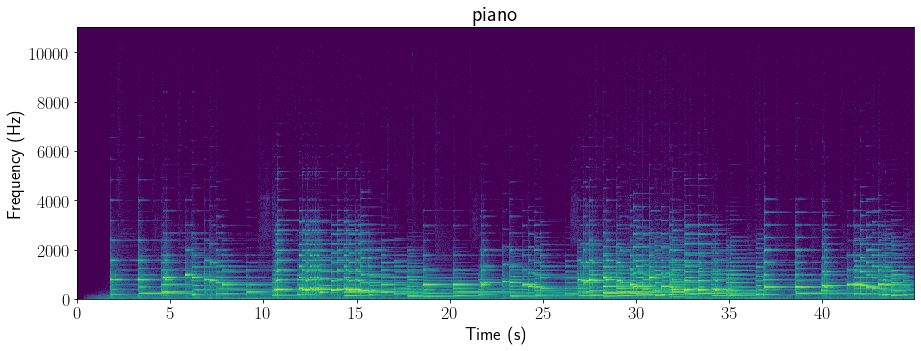

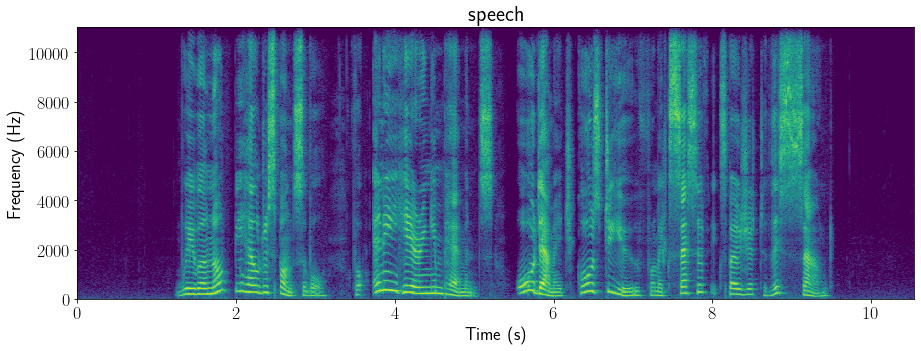

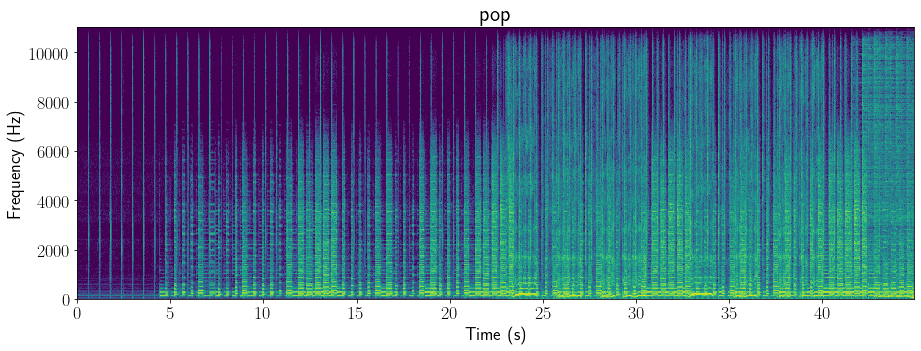

In [5]:
plt.figure(figsize=(15, 15))

for idx,key in enumerate(wave_filenames):    
    # load file, do resample to 8 KhZ (as used in the DPCM system)
    x, sampling_rate = librosa.load(wave_filenames[key], sr=22050)

    times,frequencies,spectrogram = get_spectrogram(x, sampling_rate, 1024)
    
    #  only use a dynamic range of 47 dB
    v_min = np.max(spectrogram)-47
    
    plt.figure(figsize=(15,5))
    plt.pcolormesh(times, frequencies, spectrogram, vmin=v_min, cmap='viridis')
    plt.ylabel(r'Frequency (Hz)')
    plt.xlabel(r'Time (s)')
    plt.title(key)
    plt.savefig("spectrogram_%d.png" % (idx+1),bbox_inches='tight',dpi=72)



Show frequency response of some usual windowing functions. We use the general window
$$
w[k] = c_0 + c_1\cdot\cos\left(\frac{2\pi k}{M-1}\right),\qquad k=0,1,\ldots, M-1
$$
with the following configuration for $c_0$ and $c_1$:
* Rectangular window: $c_0 = 1$, $c_1 = 0$
* Hamming window: $c_0 = 0.54$, $c_1 = -0.46$
* Hann window: $c_0 = 0.5$, $c_1 = -0.5$

C:\Users\schmalen\Anaconda3\envs\Lecture_QC\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\schmalen\Anaconda3\envs\Lecture_QC\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\schmalen\Anaconda3\envs\Lecture_QC\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


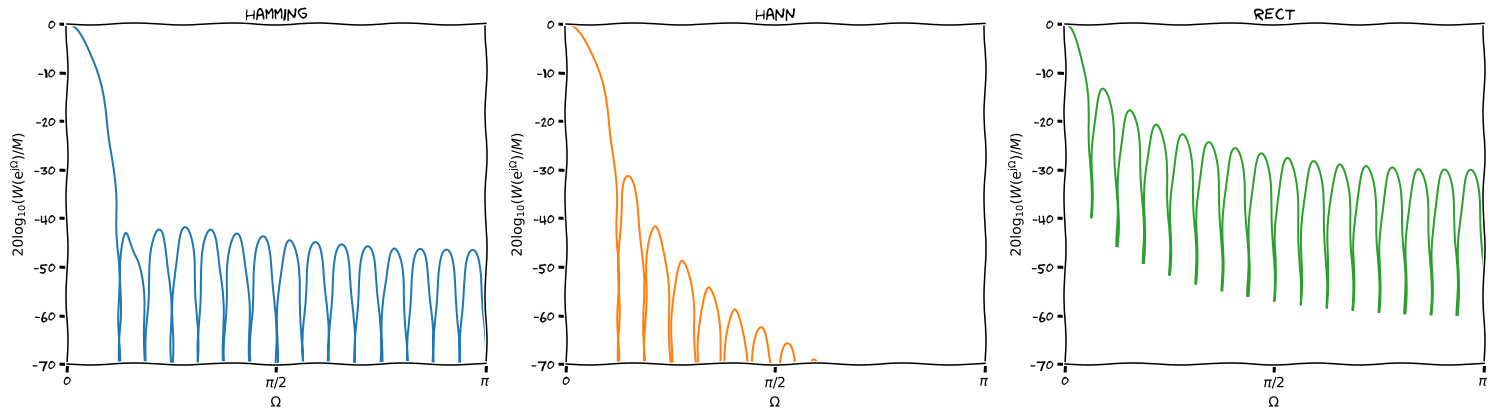

In [66]:
plt.figure(figsize=(21, 6))

for idx,window in enumerate(window_types):
    plt.subplot(1,3,idx+1)
    w = get_window(window, 32)
    Wf = np.fft.rfft(np.concatenate((w,np.zeros(3*1024))))
    Wf /= (np.abs(Wf[0]))
    plt.plot(np.linspace(0,np.pi,len(Wf)), 20*np.log10(np.abs(Wf)), color='C%d' % idx, linewidth=2)

    plt.ylim((-70,0))
    plt.xlim((0,np.pi))
    plt.xlabel('$\Omega$')
    plt.ylabel('$20\log_{10}(W(\mathrm{e}^{\mathrm{j}\Omega})/M)$')
    plt.xticks([0, np.pi/2, np.pi], ['0', r'$\pi/2$', r'$\pi$'])
    plt.title(window)
    plt.grid(True)
plt.tight_layout()
#plt.savefig('window_frequency_response.pdf',bbox_inches='tight')